# PHASE 5: ML CLUSTERING

"""

PHASE 5: Unsupervised machine learning k-means clustering model to predict drug classes of new drugs. 

Created on Friday May 12 2023 (v1)

Updated on Monday May 22 2023 (v2)

Updated on Friday May 26 2023 (v3)

Updated on Tuesday July 11 2023 (v4) - only clustering new drugs

Updated on Thursday July 13 2023 (v5) - create scatter plot

Updated on Thursday July 17 2023 (v6) - new drugs as per new C09 list


@author: Odifentse M Lehasa

The purpose of this notebook is to take the newly discovered molecules and create clusters of the new drugs.

This is an important step (together with phase 6) in determining which of the new molecules are in the ACEI or ARBs drug classes. 

We will do this using the unsupervised machine learning model of K-Means, which will create label predicitions using clustering.

"""

## STEP 0: Import Libraries

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn 
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

## STEP 1: Import Data

In [4]:
# Use dataframe of new drugs generated in phase 4 (those that passed the molecular prop. and functional group criteria).

df_combo = pd.read_csv('/Users/odilehasa/Hypertension/Final_Experiments/FINAL - October/Output/4.1. New molecules - with functional groups.csv', index_col=0)
df_combo

,Canonical SMILES,Carboxyl Functional Group (No.),Sulfhydrl Functional Group (No.),Phosphinyl Functional Group (No.),Biphenyl Functional Group (No.),Benzimidazole Functional Group (No.),Tetrazol Functional Group (No.),Functional Count
4,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...,0,0,0,0,0,1,1
6,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...,0,0,0,0,0,1,1
9,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...,1,0,0,0,0,0,1
18,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...,0,0,0,0,0,1,1
20,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
5376,NCCCC[C@@H](C(=O)N1[C@H](C2CCCCC2)C[C@@H]2CCC[...,1,0,0,0,0,0,1
5387,C[C@H](CS)C(=O)N[C@@H](CCCCN)C(=O)N1[C@H](c2no...,0,1,0,0,0,0,1
5396,CCCCC(=O)O[C@@H](CCCCN)C(=O)N1[C@H](c2noc(=O)[...,1,0,0,0,0,0,1
5397,CCC(=O)O[C@@H](CCCCN)C(=O)N1[C@H](c2noc(=O)[nH...,1,0,0,0,0,0,1


## STEP 2: K-Means to predict the classes of new molecules 

### Determine the sample data (X)/ Features

In [5]:
# include only the ACE and ARB functional groups as features.

X_combo = df_combo.iloc[:,1:7] 

In [6]:
X_combo

,Carboxyl Functional Group (No.),Sulfhydrl Functional Group (No.),Phosphinyl Functional Group (No.),Biphenyl Functional Group (No.),Benzimidazole Functional Group (No.),Tetrazol Functional Group (No.)
4,0,0,0,0,0,1
6,0,0,0,0,0,1
9,1,0,0,0,0,0
18,0,0,0,0,0,1
20,0,0,0,0,0,1
...,...,...,...,...,...,...
5376,1,0,0,0,0,0
5387,0,1,0,0,0,0
5396,1,0,0,0,0,0
5397,1,0,0,0,0,0


## STEP 3: Determine appropriate K value

### 1. Elbow Method

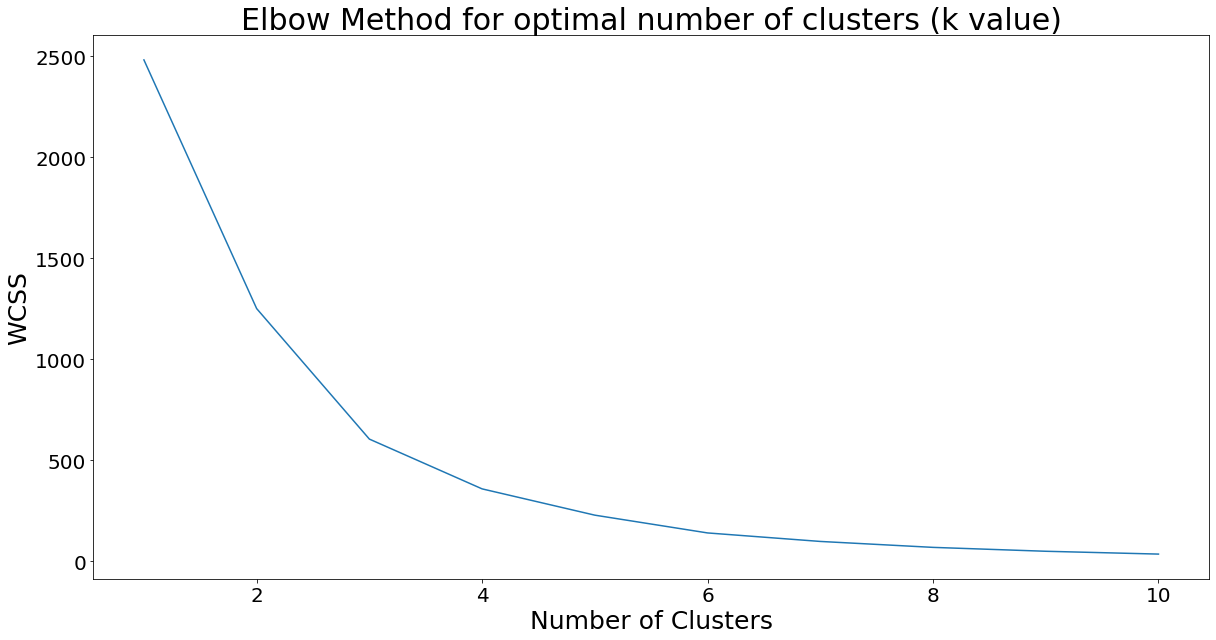

In [7]:
# Set the figure size and font size
fig = plt.subplots(figsize=(20, 10))

# Create the WCSS Plot against the no. of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_combo)
    wcss.append(kmeans.inertia_)
        
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for optimal number of clusters (k value)',fontsize=30)
plt.xlabel('Number of Clusters', fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('WCSS', fontsize=25)
plt.yticks(fontsize=20)

# save figure
plt.savefig('5.1 K-Means Elbow Method Plot.png')

plt.show()

### 2. Silhouette Method

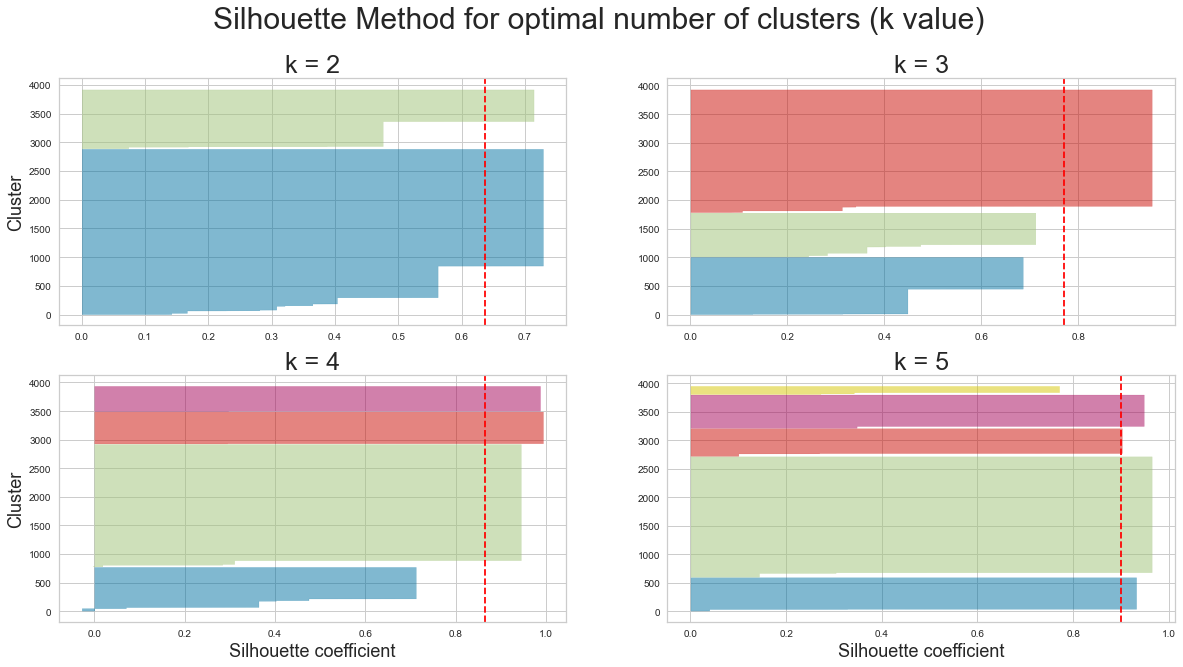

In [9]:
 
# set figure size and font size
fig, ax = plt.subplots(2, 2, figsize=(20,10)) # smaller subplots

# Create the Silhouette Plot against the no. of clusters
for i in [2, 3, 4, 5]:
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    q, mod = divmod(i, 2)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_combo)

# set plot title
plt.suptitle('Silhouette Method for optimal number of clusters (k value)',fontsize=30)

# set the title to all the subplots
ax[0, 0].set_title("k = 2", fontsize= 25)
ax[0, 1].set_title("k = 3", fontsize= 25)
ax[1, 0].set_title("k = 4", fontsize= 25)
ax[1, 1].set_title("k = 5", fontsize= 25)

# set x label
ax[1, 0].set_xlabel('Silhouette coefficient',fontsize= 18)
ax[1, 1].set_xlabel('Silhouette coefficient',fontsize= 18)

# set y label
ax[0, 0].set_ylabel('Cluster',fontsize= 18)
ax[1, 0].set_ylabel('Cluster',fontsize= 18)

# Determine the size of x and y tick labels
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)


plt.savefig('5.2 K-Means Silhouette Method Plot.png')


## STEP 4: Create K Means Cluster Model with 3 Clusters

In [10]:
kmeans = KMeans(n_clusters=3)

### Fit the model to all the data (X)

In [11]:
kmeans.fit(X_combo)


KMeans(n_clusters=3)

### View the cluster center vectors

In [12]:
clusters =kmeans.cluster_centers_
clusters

array([[ 4.41767068e-01,  1.00401606e-02,  0.00000000e+00,
        -3.03576608e-18,  0.00000000e+00,  1.00000000e+00],
       [ 9.86915888e-01,  4.43925234e-02,  0.00000000e+00,
         6.54205607e-03,  0.00000000e+00, -3.33066907e-16],
       [ 2.05366492e+00,  1.85863874e-01,  0.00000000e+00,
         1.73472348e-18,  0.00000000e+00,  8.11518325e-02]])

### Predict the closest cluster for each sample in X belongs to.

In [14]:
kmeans.predict(X_combo)


array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [15]:
len(kmeans.predict(X_combo))

3900

In [16]:
kmeans.labels_

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [17]:
label = kmeans.labels_

In [18]:
print(label)

[0 0 1 ... 1 1 1]


## STEP 5: Merge the labels with the sample dataframe

In [19]:
# Add an extra column "Clusters" to the dataframe with the values of "label"

df_combo['Clusters']= label
df_combo

,Canonical SMILES,Carboxyl Functional Group (No.),Sulfhydrl Functional Group (No.),Phosphinyl Functional Group (No.),Biphenyl Functional Group (No.),Benzimidazole Functional Group (No.),Tetrazol Functional Group (No.),Functional Count,Clusters
4,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...,0,0,0,0,0,1,1,0
6,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...,0,0,0,0,0,1,1,0
9,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...,1,0,0,0,0,0,1,1
18,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...,0,0,0,0,0,1,1,0
20,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
5376,NCCCC[C@@H](C(=O)N1[C@H](C2CCCCC2)C[C@@H]2CCC[...,1,0,0,0,0,0,1,1
5387,C[C@H](CS)C(=O)N[C@@H](CCCCN)C(=O)N1[C@H](c2no...,0,1,0,0,0,0,1,1
5396,CCCCC(=O)O[C@@H](CCCCN)C(=O)N1[C@H](c2noc(=O)[...,1,0,0,0,0,0,1,1
5397,CCC(=O)O[C@@H](CCCCN)C(=O)N1[C@H](c2noc(=O)[nH...,1,0,0,0,0,0,1,1


### Save the dataframe as a CSV file

In [21]:

df_combo.to_csv("5. Drug Clusters.csv")

# ---END HERE---